#Preprocessing Data

Import data

In [ ]:
import pandas as pd

In [ ]:
dataML=pd.read_csv('ML_2_Fellow.csv', sep=',',encoding='latin1')

View data

In [ ]:
dataML.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
dataML.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,535874.000000,535874.000000,403182.000000
mean,9.587927,4.636533,15287.687868
std,153.292222,97.302232,1714.009551
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,74215.000000,38970.000000,18287.000000


Type Data

In [ ]:
dataML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [ ]:
#change object to datetime in Tanggal_Transaksi
dataML['Tanggal_Transaksi']=pd.to_datetime(dataML['Tanggal_Transaksi'])

Missing Value


In [ ]:
dataML.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

In [ ]:
dataML.isnull().sum()/len(dataML)

Kode_Bayar           0.000000
Kode_Barang          0.011137
Barang               0.013820
Jumlah               0.011137
Tanggal_Transaksi    0.011137
Harga_Satuan         0.011137
Kode_Pelanggan       0.255997
Negara               0.011137
dtype: float64

In [ ]:
#drop missing value
dataML=dataML.dropna()

Outlier

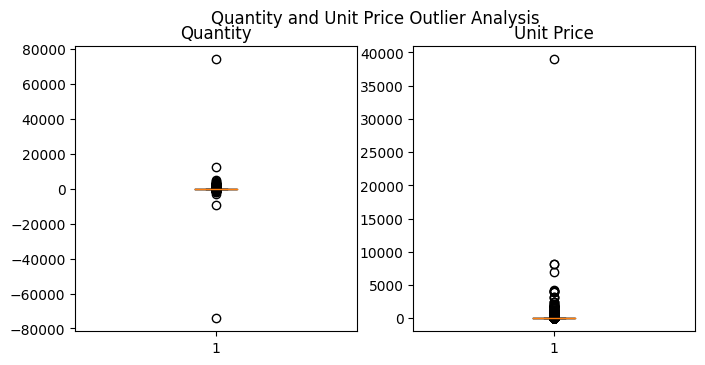

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("default")
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (8,3.7))

ax1.boxplot(dataML["Jumlah"])
ax1.set_title("Quantity")
ax2.boxplot(dataML["Harga_Satuan"])
ax2.set_title("Unit Price")
fig.suptitle("Quantity and Unit Price Outlier Analysis")
plt.show()

In [ ]:
#boxplot with float data
Q1 = dataML[['Harga_Satuan','Jumlah']].quantile(0.25)
Q3 = dataML[['Harga_Satuan','Jumlah']].quantile(0.75)
IQR = Q3 - Q1

(((dataML[['Harga_Satuan','Jumlah']] < (Q1 - 1.5 * IQR)) | (dataML[['Harga_Satuan','Jumlah']] > (Q3 + 1.5 * IQR))).sum())

Harga_Satuan    35924
Jumlah          26437
dtype: int64

In [ ]:
(((dataML[['Harga_Satuan','Jumlah']] < (Q1 - 1.5 * IQR)) | (dataML[['Harga_Satuan','Jumlah']] > (Q3 + 1.5 * IQR))).sum())/len(dataML)

Harga_Satuan    0.089101
Jumlah          0.065571
dtype: float64

In [ ]:
#delete 0 and negative value
dataML=dataML.loc[dataML['Jumlah'] >= 0]

In [ ]:
dataML=dataML.loc[dataML['Harga_Satuan'] >= 0]

1.	What items customers buy the most and are there any items we should ignore?

In [ ]:
tingkatbar=dataML.groupby('Barang')['Jumlah'].sum()

In [ ]:
tingkatbar.sort_values(ascending=False).head(5)

Barang
MEDIUM CERAMIC TOP STORAGE JAR        77916.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415.0
JUMBO BAG RED RETROSPOT               46181.0
WHITE HANGING HEART T-LIGHT HOLDER    36725.0
ASSORTED COLOUR BIRD ORNAMENT         35362.0
Name: Jumlah, dtype: float64

In [ ]:
barangabai=tingkatbar.loc[tingkatbar==1]
barangabai.to_frame()

,Jumlah
Barang,
I LOVE LONDON MINI RUCKSACK,1.0
AMBER BERTIE GLASS BEAD BAG CHARM,1.0
AMBER GLASS/SHELL/PEARL NECKLACE,1.0
BAROQUE BUTTERFLY EARRINGS CRYSTAL,1.0
BLACK DROP EARRINGS W LONG BEADS,1.0
BLACK FINE BEAD NECKLACE W TASSEL,1.0
BLACK VINT ART DEC CRYSTAL BRACELET,1.0
BLACKCHRISTMAS TREE 30CM,1.0
BLOSSOM IMAGES SCRAP BOOK SET,1.0


2.	What is our strategy to increase sales based on our export destination countries?

In [ ]:
ngrtujuan=dataML.groupby('Negara')[['Jumlah']].sum()
ngrtujuan.sort_values('Jumlah', ascending=True).head(10)

,Jumlah
Negara,
Saudi Arabia,80.0
Bahrain,260.0
RSA,352.0
Brazil,356.0
Lebanon,386.0
European Community,499.0
Lithuania,652.0
Czech Republic,671.0
Malta,958.0


3.	Do customer segmentation appropriately. Please explain in detail and completely

In [ ]:
dataML.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Variable sales amount and total price for each customer
dataseg=dataML.groupby('Kode_Pelanggan')[['Jumlah']].sum()
dataseg['Pengeluaran_Pelanggan']=dataML.groupby('Kode_Pelanggan')[['Harga_Satuan']].sum()

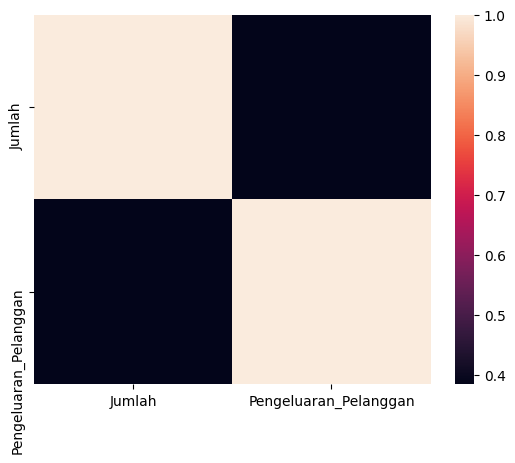

In [ ]:
#check corelation 2 variable
corr=dataseg.corr()
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


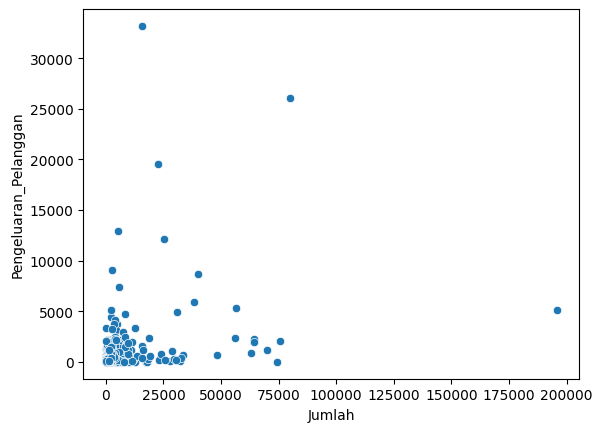

In [ ]:
#Plotting the data
sns.scatterplot(dataseg['Jumlah'],dataseg['Pengeluaran_Pelanggan'])

In [ ]:
#modeling K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

num_clusters = 2
kmeans_model = KMeans(n_clusters=num_clusters, random_state=1).fit(dataseg)
cluster_labels = kmeans_model.labels_

In [ ]:
#model evaluaion
print(f'Silhouette Score(Cluster = 2): {silhouette_score(dataseg, cluster_labels)}')

Silhouette Score(Cluster = 2): 0.9780361487279027


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


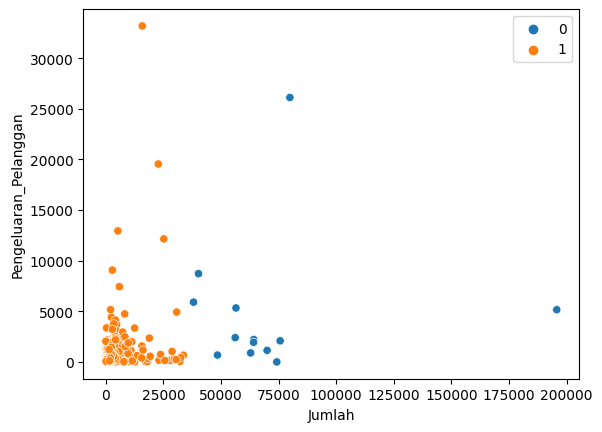

In [ ]:
# plot cluster
sns.scatterplot(dataseg['Jumlah'],dataseg['Pengeluaran_Pelanggan'],hue=cluster_labels)

In [ ]:
#character each cluster
dataseg['label']=cluster_labels
dataseg1=dataseg.loc[dataseg['label']==1]
dataseg0=dataseg.loc[dataseg['label']==0]

In [ ]:
dataseg1.describe()

,Jumlah,Pengeluaran_Pelanggan,label
count,4324.000000,4324.000000,4324.0
mean,952.862858,270.826849,1.0
std,2131.592016,759.146011,0.0
min,1.000000,0.000000,1.0
25%,158.000000,51.345000,1.0
50%,374.500000,126.000000,1.0
75%,968.500000,289.875000,1.0
max,33704.000000,33189.950000,1.0


In [ ]:
dataseg0.describe()

,Jumlah,Pengeluaran_Pelanggan,label
count,13.000000,13.000000,13.0
mean,71232.384615,4814.116154,0.0
std,39577.386331,6881.118468,0.0
min,38083.000000,1.040000,0.0
25%,56141.000000,1143.320000,0.0
50%,64124.000000,2219.550000,0.0
75%,74215.000000,5328.170000,0.0
max,195715.000000,26119.460000,0.0


4.	Get the hidden insight from the data

See the month with the most sales

In [ ]:
#change to month data
dataML['Bulan_Transaksi']=dataML['Tanggal_Transaksi'].dt.month

[Text(0.5, 1.0, 'Sales Month')]

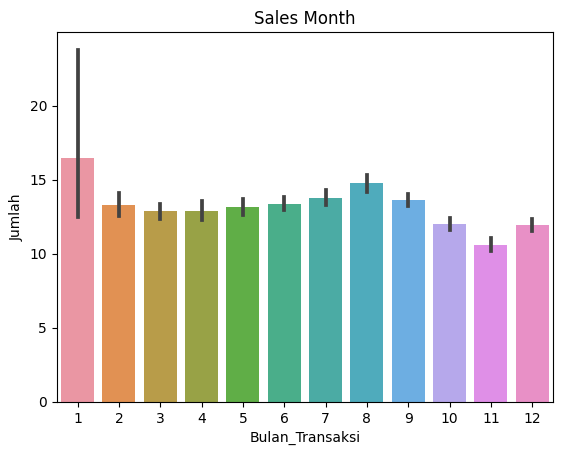

In [ ]:
#plot team based on goals conceded
sns.barplot(data=dataML, x="Bulan_Transaksi", y="Jumlah").set(title='Sales Month')